<a href="https://colab.research.google.com/github/Yusufsy/osum/blob/main/T5Sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 24.2 MB/s 
     |████████████████████████████████| 7.6 MB 53.1 MB/s 
     |████████████████████████████████| 163 kB 45.0 MB/s 


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 24.4 MB/s 


GET AREA

0.3


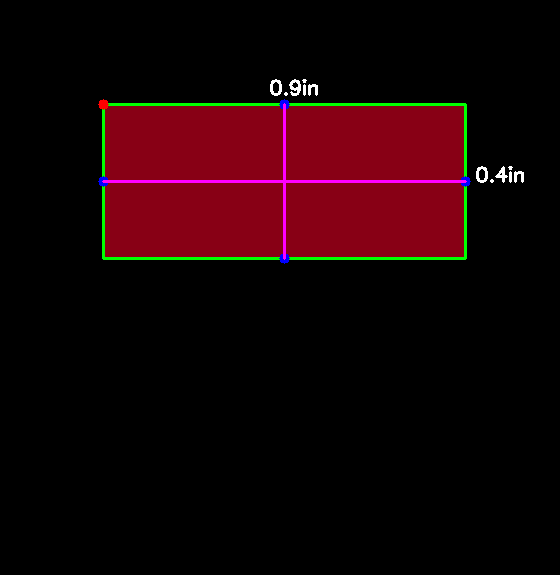

0.3


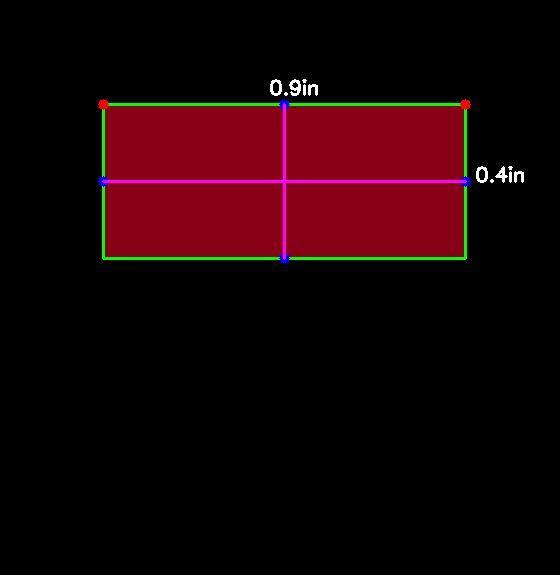

0.3


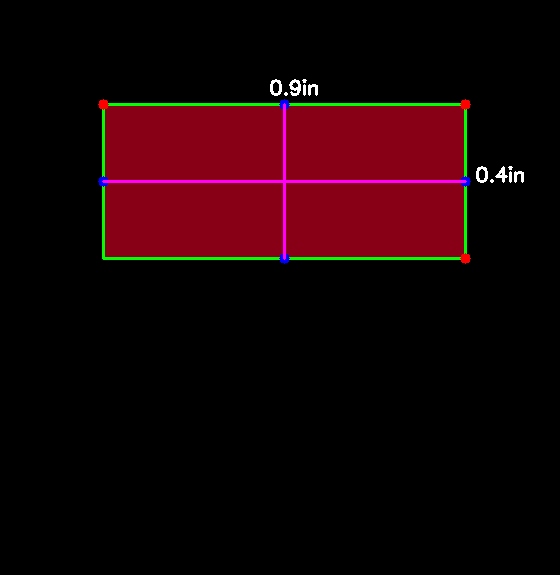

0.3


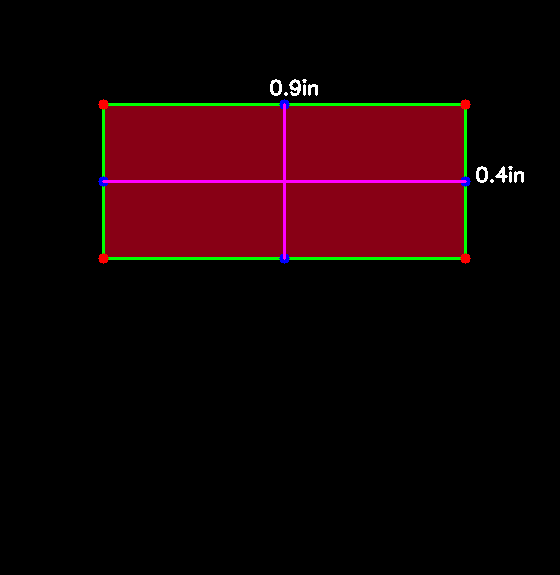

In [ ]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from google.colab.patches import cv2_imshow
import numpy as np
#import argparse
import imutils
import cv2
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
	#help="path to the input image")
#ap.add_argument("-w", "--width", type=float, required=True,
	#help="width of the left-most object in the image (in inches)")
#args = vars(ap.parse_args())

# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("/content/drive/My Drive/testimage2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable
(cnts, _) = contours.sort_contours(cnts)
pixelsPerMetric = None

# loop over the contours individually
for c in cnts:
	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue
	# compute the rotated bounding box of the contour
	orig = image.copy()
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
		# unpack the ordered bounding box, then compute the midpoint
		# between the top-left and top-right coordinates, followed by
		# the midpoint between bottom-left and bottom-right coordinates
		(tl, tr, br, bl) = box
		(tltrX, tltrY) = midpoint(tl, tr)
		(blbrX, blbrY) = midpoint(bl, br)
		# compute the midpoint between the top-left and top-right points,
		# followed by the midpoint between the top-righ and bottom-right
		(tlblX, tlblY) = midpoint(tl, bl)
		(trbrX, trbrY) = midpoint(tr, br)
		# draw the midpoints on the image
		cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
		# draw lines between the midpoints
		cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
				 (255, 0, 255), 2)
		cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
				 (255, 0, 255), 2)

		# compute the Euclidean distance between the midpoints
		dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
		dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
		# if the pixels per metric has not been initialized, then
		# compute it as the ratio of pixels to supplied metric
		# (in this case, inches)
		if pixelsPerMetric is None:
			pixelsPerMetric = dB / 0.9

		# compute the size of the object
		dimA = dA / pixelsPerMetric
		dimB = dB / pixelsPerMetric
		area = dimA * dimB
		print("{:.1f}".format(area))
		# draw the object sizes on the image
		cv2.putText(orig, "{:.1f}in".format(dimB),
					(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
					0.65, (255, 255, 255), 2)
		cv2.putText(orig, "{:.1f}in".format(dimA),
					(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
					0.65, (255, 255, 255), 2)
		# show the output image
		cv2_imshow(orig)
		#cv2.waitKey(0)

In [ ]:
import torch
import json
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

text ="""
a 49-year-old gunman who was holed up in a vintage blue bus has been shot dead following a seven-hour standoff with swat officers that involved heavy gunfire , tear gas and the use of an armored car .
mark hawkins reportedly barricaded himself inside the greyhound-style bus in the parking lot of a walmart in salem , oregon , after he was approached by police , who believed him to be wanted .
seconds later , hawkins , who was being hunted in lane county for failing to appear on a charge of delivery of a controlled substance , allegedly fired his weapon from the front of the large vehicle .
the bullet struck a police dog named baco in the head , prompting an exchange of gunfire between officers and hawkins .
numerous law enforcement agencies in the area then rushed to the scene .
scroll down for video .
wrecked : mark hawkins , 49 , who was holed up in a vintage blue bus has been shot dead following a seven-hour standoff with swat officers .
above , the bus is pictured in a wrecked off after the standoff on friday .
finally out : a law enforcement official is pictured dragging hawkins -lrb- whose limb can be seen in the official 's grip -rrb- out of the greyhound-style bus , which was situated in the parking lot of a walmart in salem , oregon .
shot dead : the suspect -lrb- left and right -rrb- , who was wanted in lane county for failing to appear on a charge of delivery of a controlled substance , had barricaded himself in the vehicle after he was approached by police .
in the hours after the first shot , which occurred shortly before noon on friday , swat officers and police fired more than a dozen rounds of tear gas at the bus in turner road - but to no avail .
they locked down all shops in the area , including the walmart , as they attempted to force hawkins out of the vehicle .
they finally decided to ram an armored car into the blue bus , according to koin.com .
in incredible scenes , swat offers drove the car into the bus , punching holes in the larger vehicle .
but the suspect apparently still refused to comply with officers and ` continued to brandish a handgun ' .
at around 6.30 pm , police shot at the suspect multiple times .
he was hit and wounded by nine bullets , causing him to slide out of the bus .
he was then taken to a nearby hospital , where he later died . '
-lsb- hawkins -rsb- has since died of his injuries , ' the salem police department said on friday night .
it is not yet known whether the bus belonged to hawkins - and if not , how he managed to get into the vehicle .
the officers involved in the shooting - officer joshua edmiston , officer vincent dawson and officer sean bennet - have now been placed on administrative leave pending an investigation , police said . . vintage : hawkins allegedly fired a weapon from the front of the large vehicle .
the bullet struck a police dog named baco in the head , prompting an exchange of bullets between officers and hawkins .
above , the bus .
firing tear gas : in the hours after the first shot , which occurred shortly before noon on friday , swat officers and police fired more than a dozen rounds of tear gas -lrb- pictured -rrb- at the bus in turner road - but to no avail .
lock down : they locked down all shops in the area , including the walmart , as they attempted to force hawkins out of the vehicle .
they finally decided to ram an armored car into the bus , it is reported .
meanwhile , k-9 baco was taken to a nearby vet , where he was treated and released .
he is now recovering at home with his handler , according to the police department 's facebook page .
an autopsy by the oregon state medical examiner on saturday showed that hawkins was shot nine times by officers during the standoff .
he apparently died of gunshot wounds to the chest .
on his facebook page , hawkins is pictured smiling while cuddling his pet dog at his eugene home .
an investigation is ongoing . . recovering : the standoff occurred in the parking lot of this walmart -lrb- right -rrb- in turner road .
k-9 baco -lrb- left -rrb- , who was injured in the shooting , was taken to a nearby vet , where he was treated and released ...
"""


preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
print ("original text preprocessed: \n", preprocess_text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)

print("Area is: ")
#print(area)
max_space = area * 100
print(round(max_space))
# summmarize
summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=5,
                                    # min_length=10,
                                    # max_length=50,
                             max_new_token=50,
                                    early_stopping=False)

output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output)

# Summarized output from above ::::::::::
# the us has over 637,000 confirmed Covid-19 cases and over 30,826 deaths.
# president Donald Trump predicts some states will reopen the country in april, he said.
# "we'll be the comeback kids, all of us," the president says.

Token indices sequence length is longer than the specified maximum sequence length for this model (1183 > 512). Running this sequence through the model will result in indexing errors


original text preprocessed: 
 a 49-year-old gunman who was holed up in a vintage blue bus has been shot dead following a seven-hour standoff with swat officers that involved heavy gunfire , tear gas and the use of an armored car .mark hawkins reportedly barricaded himself inside the greyhound-style bus in the parking lot of a walmart in salem , oregon , after he was approached by police , who believed him to be wanted .seconds later , hawkins , who was being hunted in lane county for failing to appear on a charge of delivery of a controlled substance , allegedly fired his weapon from the front of the large vehicle .the bullet struck a police dog named baco in the head , prompting an exchange of gunfire between officers and hawkins .numerous law enforcement agencies in the area then rushed to the scene .scroll down for video .wrecked : mark hawkins , 49 , who was holed up in a vintage blue bus has been shot dead following a seven-hour standoff with swat officers .above , the bus is pict

In [ ]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

hypothesis = "mark hawkins was shot nine times by police during the seven-hour standoff in salem, oregon on friday night after being approached and asked to get out of his car with an armord vehicle at 6.30pm."

reference = """
mark hawkins , 49 , allegedly barricaded himself inside a vintage blue bus .
wanted for failing to appear in court for ` delivery of controlled substance ' during seven-hour standoff , hawkins ` shot and wounded police dog ' swat team fired over 12 rounds of tear gas in bid to force him out of bus .
they finally decided to ram armored car into vehicle , punching holes in it .
at about 6.30 pm friday , hawkins was shot nine times by cops ; later died .
officers involved are on administrative leave ; an investigation is ongoing .
"""

rouge = Rouge()
scores = rouge.get_scores(hypothesis, reference)
scores

[{'rouge-1': {'r': 0.2839506172839506,
   'p': 0.6388888888888888,
   'f': 0.39316238890203814},
  'rouge-2': {'r': 0.08247422680412371,
   'p': 0.22857142857142856,
   'f': 0.12121211731519754},
  'rouge-l': {'r': 0.2222222222222222, 'p': 0.5, 'f': 0.3076923034319527}}]